# LSTM  Network #

In this notebook we will build LSTM Recurrent NN to classify Sentiments using Keras

In [0]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from keras.layers import SimpleRNN # new! 
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt 
%matplotlib inline

**Set Hyperparameter**

In [0]:
output_dir = 'data/conv'

#Training 
epochs = 16
batch_size = 128

#vector-space embedding
n_dim = 64
n_unique_words = 5000
max_review_length = 100
pad_type = trunc_type = 'pre'
drop_embed = 0.25

#rnn architecture 
n_rnn = 256
drop_rnn = 0.2


**Load Data**

In [0]:
(X_train,y_train),(X_valid,y_valid) = imdb.load_data(num_words=n_unique_words)

In [22]:
X_train.shape,y_train.shape

((25000,), (25000,))

In [23]:
X_valid.shape,y_valid.shape

((25000,), (25000,))

**Preprocess Data**

In [0]:
X_train = pad_sequences(X_train,maxlen=max_review_length,padding=pad_type,value=0)
X_valid = pad_sequences(X_valid,maxlen=max_review_length,padding=pad_type,value=0)

**Design Neural Network**

In [0]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(SimpleRNN(n_rnn, dropout=drop_rnn))
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 64)           320000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 100, 64)           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 256)               82176     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 402,433
Trainable params: 402,433
Non-trainable params: 0
_________________________________________________________________


**Confihure Model**

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")

In [0]:
# Check if the output dir is present or not
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

**Train :) **

In [30]:
X_valid.shape,y_valid.shape

((25000, 100), (25000,))

In [31]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(X_valid, y_valid), callbacks=[modelcheckpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/16
25000/25000 [==============================] - 19s 749us/step - loss: 0.7050 - acc: 0.5079 - val_loss: 0.7222 - val_acc: 0.5012
Epoch 2/16
25000/25000 [==============================] - 18s 730us/step - loss: 0.6973 - acc: 0.5165 - val_loss: 0.6893 - val_acc: 0.5241
Epoch 3/16
 4736/25000 [====>.........................] - ETA: 12s - loss: 0.6968 - acc: 0.517925000/25000 [==============================] - 18s 729us/step - loss: 0.6909 - acc: 0.5362 - val_loss: 0.6848 - val_acc: 0.5394
Epoch 4/16
25000/25000 [==============================] - 18s 727us/step - loss: 0.6693 - acc: 0.5794 - val_loss: 0.6577 - val_acc: 0.5899
Epoch 5/16
15232/25000 [=================>............] - ETA: 5s - loss: 0.6335 - acc: 0.640225000/25000 [==============================] - 18s 728us/step - loss: 0.6221 - acc: 0.6518 - val_loss: 0.5939 - val_acc: 0.6846
Epoch 6/16
25000/25000 [==============================] - 18s 731us/step - loss: 0.5428 

In [0]:
model.load_weights(output_dir+"/weights.08.hdf5")

In [0]:
y_hat = model.predict_proba(X_valid)

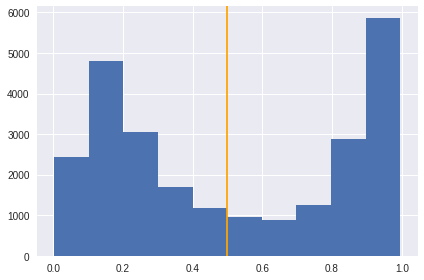

In [39]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')
plt.tight_layout()

**Evaluate the model**

In [0]:
auc = roc_auc_score(y_valid,y_hat)*100

In [41]:
"{:0.2f}".format(auc)

'86.27'